In [1]:
from constants import*
from functions import*
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

dataFolder = 'data/'

0.0177717228363


## Load data

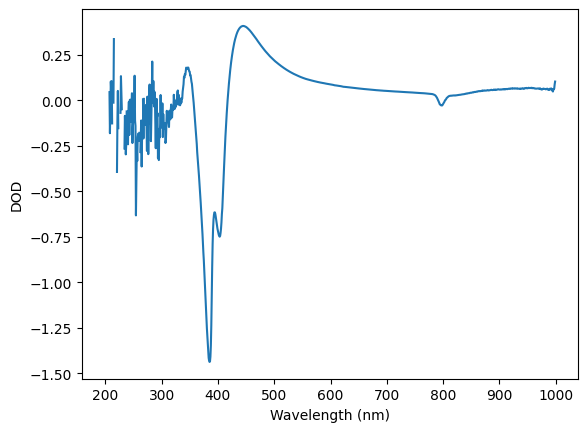

In [2]:
#I handle Inf and NaN, replacing them with np.nan as they're treated as float and not mere strings.
DODtestDF = pd.read_csv(dataFolder+'TASavgMatrix.csv', header = None, na_values=["Inf", "-Inf", "NaN"])
DODtestDF.replace([np.inf, -np.inf], np.nan, inplace=True)
DODtestWavelength = DODtestDF.iloc[1:,0].to_numpy(dtype=float)
DODtestDelay = DODtestDF.iloc[0,1:].to_numpy(dtype=float)
DODtestSpectrum = DODtestDF.iloc[1:,1:].to_numpy(dtype=float)

testDelay = 1
delayIndex = np.searchsorted(DODtestDelay, testDelay, side="left")
fixedDelaySpectrum = DODtestSpectrum[:,delayIndex]

Figure, ax=plt.subplots()
ax.plot(DODtestWavelength, fixedDelaySpectrum)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('DOD')
plt.show()

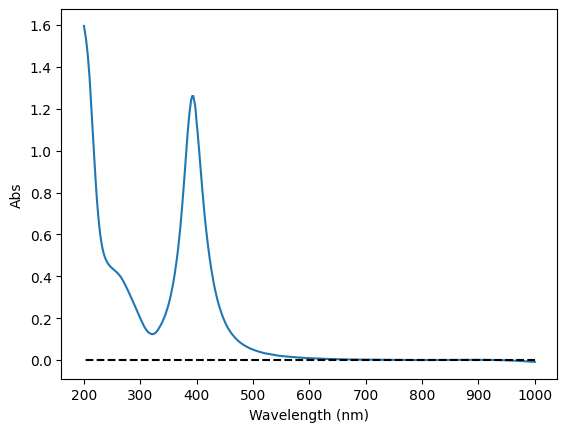

In [3]:
UVvisData = np.loadtxt(dataFolder+'absorbance30uJafter.csv', delimiter = ',')
UVvisDataWavelength = UVvisData[:,0]
UVvisDataSpectrum = UVvisData[:,1]-0.03

Figure, ax=plt.subplots()
ax.plot(UVvisDataWavelength, UVvisDataSpectrum)
ax.hlines(0, UVvisDataWavelength[0], UVvisDataWavelength[-1], color = 'black', linestyles = '--')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Abs')
plt.show()

In [4]:
sigma = 10
xAxisMax = 100 

UVvisConvolutedRaw, gaussianKernel = convolutionGaussian(UVvisDataSpectrum, sigma, xAxisMax)


I don't know if the convolution affects the x axis, i.e if it stretches it or what. So, assuming the maxima position is preserved, the convolution should give the same difference betweeen maxima indices. That's why I'm looking for the maxima here. 

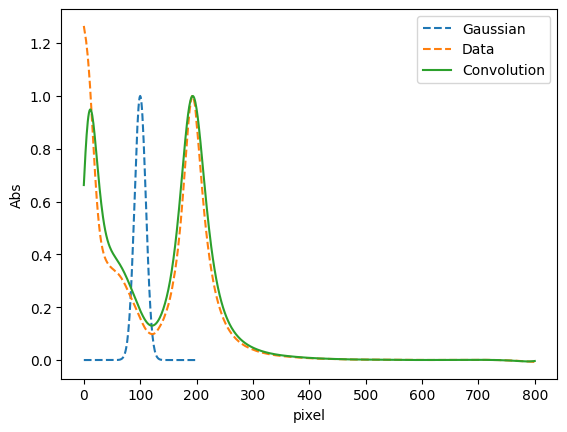

['12', '193']
Difference between maximums in index is: 181


In [5]:
UVvisConvolutedNoZeros = UVvisConvolutedRaw[UVvisConvolutedRaw !=0]
UVvisConvoluted = UVvisConvolutedNoZeros[::-1]

dummyAxis = range(len(UVvisConvoluted))

maximums, _ = find_peaks(UVvisDataSpectrum, height=0.2)
maximumsConv, _ = find_peaks(UVvisConvoluted, height=max(UVvisConvoluted)/2)

Figure, ax = plt.subplots()
ax.plot(range(len(gaussianKernel)), gaussianKernel/max(gaussianKernel), linestyle = '--',label = 'Gaussian')
ax.plot(range(len(UVvisDataSpectrum)), UVvisDataSpectrum[::-1]/UVvisDataSpectrum[maximums[0]], linestyle = '--', label = 'Data')
ax.plot(range(len(UVvisConvoluted)), UVvisConvoluted/max(UVvisConvoluted), label = 'Convolution')
ax.set_xlabel('pixel')
ax.set_ylabel('Abs')
ax.legend()
plt.show()

formatedMaximums = [f"{index:.4g}" for index in maximumsConv]
print(formatedMaximums)
print('Difference between maximums in index is: {:.4g}' .format(maximumsConv[1]-maximumsConv[0]))

## Getting the Product Spectra

In [20]:

#DODInterpolated = funcInterpolate(DODtestWavelength, fixedDelaySpectrum, UVvisDataWavelength)

mask = ~np.isnan(fixedDelaySpectrum[::-1])
listTrue = [x for x in mask if ~x]

print(len(listTrue))

xOriginal = DODtestWavelength[::-1][mask]
yOriginal = fixedDelaySpectrum[::-1][mask]

myInterpolator = interpolate.interp1d(xOriginal, yOriginal, kind = 'cubic', fill_value='extrapolate')
asd = myInterpolator(UVvisDataWavelength[::-1])

print(asd)

print("NaNs in x:", np.isnan(xOriginal).sum(), "NaNs in y:", np.isnan(yOriginal).sum())
print("Infs in x:", np.isinf(xOriginal).sum(), "Infs in y:", np.isinf(yOriginal).sum())
'''
Figure, ax = plt.subplots()
ax.plot(UVvisDataWavelength, DODInterpolated)
ax.set_xlabel('Wavelength(nm)')
ax.set_ylabel('DOD')
plt.show()
'''

27
[-2.47999431e-02  4.24404069e-02 -1.45676545e-02 -1.27034469e-01
 -2.26170376e-01 -2.43185719e-01 -1.09538439e-01  7.88607724e-02
 -1.35410982e-01 -5.81751391e-02  9.40969019e-02  9.13434183e-02
 -8.08520546e-02 -2.95184742e-01 -1.83572812e-01  2.27785822e-01
  4.62640454e-01  3.11208006e-01 -3.28362735e-02 -3.54668779e-01
 -4.89370921e-01 -3.14505947e-01  3.23770667e-02 -1.34531602e-01
 -5.51152155e-02  9.72445979e-02 -5.09686814e-02 -7.10792600e-02
  1.35372164e-01 -1.44081077e-02 -1.04567065e-01 -1.78722788e-01
 -2.50885132e-01 -3.27126394e-01 -2.76246164e-01 -8.19265446e-02
 -2.47891646e-01 -2.73348266e-01 -5.73628091e-02 -1.20954901e-01
 -2.54728329e-01 -9.06730144e-02 -3.65944100e-02 -1.32078497e-01
  2.36048598e-02 -7.19524085e-02 -1.11611996e-01  4.22758519e-02
 -2.00193438e-01 -1.36566569e-01 -8.86444806e-02 -5.86902987e-02
  1.37584957e-01 -1.19891477e-01 -3.86196854e-01 -5.30751192e-01
 -2.61117966e-01 -3.08117289e-01 -1.78252689e-01 -1.87277721e-01
 -2.20161291e-01 -1.87

"\nFigure, ax = plt.subplots()\nax.plot(UVvisDataWavelength, DODInterpolated)\nax.set_xlabel('Wavelength(nm)')\nax.set_ylabel('DOD')\nplt.show()\n"